In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# %matplotlib
import os
import sys
os.getcwd()

'/home/pilab/workspace/Mast'

In [2]:
verity_col = ['time', 'idx', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'proc']
h10_col = ['time', 'idx', 'sensor', 'proc']
# REST = 1, COLD = 2, CACULATE = 3, EMPTY = 0 
MAST_PROTOCOL = [1,2,3,2,3,2,3,2,3,2]
# MAST_PROTOCOL = ['REST','COLD','CACUL','COLD','CACUL','COLD','CACUL','COLD','CACUL','COLD']
# MAST_PROTOCOL = [['REST'],['COLD'],['CACUL'],['COLD'],['CACUL'],['COLD'],['CACUL'],['COLD'],['CACUL'],['COLD']]
MAST_TIME_TABLE = [600, 90, 45, 60, 60, 60, 90, 90, 45, 60]
mast_verity = pd.read_csv("(M)000_20230408_191637_Verity.csv", names = verity_col)
mast_h10 = pd.read_csv("(M)000_20230408_191637_H10.csv", names = h10_col)

In [3]:
print('H10 모양 :', mast_h10.shape)
print('verity 모양 :', mast_verity.shape)

H10 모양 : (181916, 4)
verity 모양 : (7304, 7)


In [4]:
time_format = "%Y%m%d%H%M%S%f"
mast_verity['times'] = pd.to_datetime(mast_verity['time'], format = time_format)
zero_list = [0]
mast_verity['interval'] = zero_list + [mast_verity['times'].loc[i+1]-mast_verity['times'].loc[i] for i in range(len(mast_verity)-1)]
mver_start_time = mast_verity.iloc[0][-2]
mver_end_time = mast_verity.iloc[-1][-2]

print(mast_verity.head())
print(mast_verity.tail())
print('시작 시간:',mver_start_time)
print('종료 시간:',mver_end_time)
print('총 측정 시간:', mver_end_time-mver_start_time)

                   time   idx  sensor1  sensor2  sensor3  sensor4  proc   
0  20230408191637212798  2536    96044   149681   270714  -184256   NaN  \
1  20230408191637230979  2537    96062   149569   270783  -184126   NaN   
2  20230408191637249161  2538    96064   149508   271050  -184557   NaN   
3  20230408191637267343  2539    96058   149754   271101  -184236   NaN   
4  20230408191637943240  2540    94573   146931   269703  -184183   NaN   

                       times                interval  
0 2023-04-08 19:16:37.212798                       0  
1 2023-04-08 19:16:37.230979  0 days 00:00:00.018181  
2 2023-04-08 19:16:37.249161  0 days 00:00:00.018182  
3 2023-04-08 19:16:37.267343  0 days 00:00:00.018182  
4 2023-04-08 19:16:37.943240  0 days 00:00:00.675897  
                      time   idx  sensor1  sensor2  sensor3  sensor4  proc   
7299  20230408193956271074  9835   129092   178355   284196  -184782   NaN  \
7300  20230408193956938914  9836   127744   177972   284130  -1

In [5]:
period= mver_start_time
period_ls = [mver_start_time]
p_len = [0]
part_len = []
tmp = 0
for s in MAST_TIME_TABLE:
    period += datetime.timedelta(seconds = s)
    period_ls.append(period) 
for i in range(len(period_ls)-1):
    period_length = len(mast_verity[mast_verity.times.between(period_ls[i], period_ls[i+1]) == True])
    tmp += period_length
    part_len.append(period_length)
    p_len.append(tmp)
for i in range(len(p_len)-1):
    mast_verity.loc[p_len[i]:p_len[i+1], 'proc'] = MAST_PROTOCOL[i]
print(part_len, p_len)

[3120, 480, 236, 312, 312, 304, 472, 467, 233, 312] [0, 3120, 3600, 3836, 4148, 4460, 4764, 5236, 5703, 5936, 6248]


In [6]:
mast_h10['times'] = pd.to_datetime(mast_h10['time'], format = time_format)
zero_list = [0]
mast_h10['interval'] = zero_list + [mast_h10['times'].loc[i+1]-mast_h10['times'].loc[i] for i in range(len(mast_h10)-1)]
mh10_start_time = mast_h10.iloc[0][-2]
mh10_end_time = mast_h10.iloc[-1][-2]

print(mast_h10.head())
print(mast_h10.tail())
print('시작 시간:',mh10_start_time)
print('종료 시간:',mh10_end_time)
print('총 측정 시간:', mh10_end_time-mh10_start_time)

                   time    idx  sensor  proc                      times   
0  20230408191636508537  62707    -322   NaN 2023-04-08 19:16:36.508537  \
1  20230408191636516229  62708    -326   NaN 2023-04-08 19:16:36.516229   
2  20230408191636523921  62709    -353   NaN 2023-04-08 19:16:36.523921   
3  20230408191636531614  62710    -353   NaN 2023-04-08 19:16:36.531614   
4  20230408191636539306  62711    -244   NaN 2023-04-08 19:16:36.539306   

                 interval  
0                       0  
1  0 days 00:00:00.007692  
2  0 days 00:00:00.007692  
3  0 days 00:00:00.007693  
4  0 days 00:00:00.007692  
                        time     idx  sensor  proc                      times   
181911  20230408193957294121  244618     155   NaN 2023-04-08 19:39:57.294121  \
181912  20230408193957301813  244619     131   NaN 2023-04-08 19:39:57.301813   
181913  20230408193957309505  244620     143   NaN 2023-04-08 19:39:57.309505   
181914  20230408193957317198  244621     171   NaN 2023-0

In [7]:
period= mh10_start_time
period_ls = [mh10_start_time]
period_sector = [0]
part_len = []
tmp = 0
for s in MAST_TIME_TABLE:
    period += datetime.timedelta(seconds = s)
    period_ls.append(period) 
for i in range(len(period_ls)-1):
    period_length = len(mast_h10[mast_h10.times.between(period_ls[i], period_ls[i+1]) == True])
    tmp += period_length
    part_len.append(period_length)
    period_sector.append(tmp)
for i in range(len(period_sector)-1):
    mast_h10.loc[period_sector[i]:period_sector[i+1], 'proc'] = MAST_PROTOCOL[i]
print(part_len, period_sector)

[77939, 11656, 5853, 7784, 7800, 7784, 11687, 11687, 5847, 7790] [0, 77939, 89595, 95448, 103232, 111032, 118816, 130503, 142190, 148037, 155827]


In [8]:
print('시작 오차:', mver_start_time-mh10_start_time)
print('종료 오차:', mver_end_time-mh10_end_time)

시작 오차: 0 days 00:00:00.704261
종료 오차: -1 days +23:59:59.668569


In [9]:
# mast_h10 = mast_h10.set_index('times')
# mast_verity = mast_verity.set_index('times')

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})

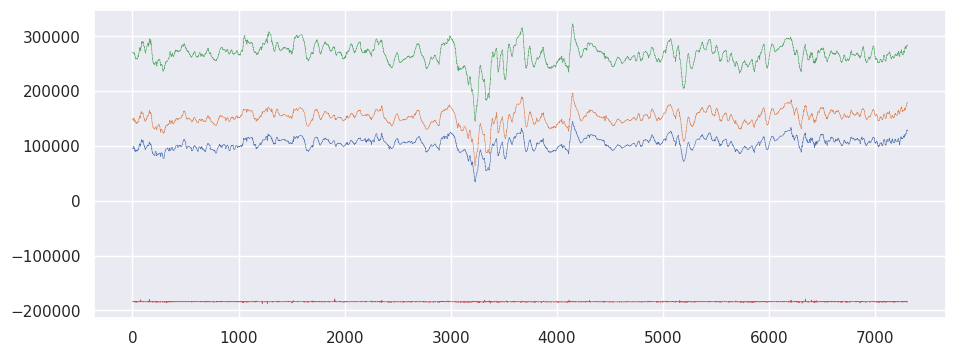

In [11]:
mplot = mast_verity['sensor1'].plot(linewidth = 0.4)
mplot = mast_verity['sensor2'].plot(linewidth = 0.4)
mplot = mast_verity['sensor3'].plot(linewidth = 0.4)
mplot = mast_verity['sensor4'].plot(linewidth = 0.4)

<Figure size 1200x800 with 0 Axes>

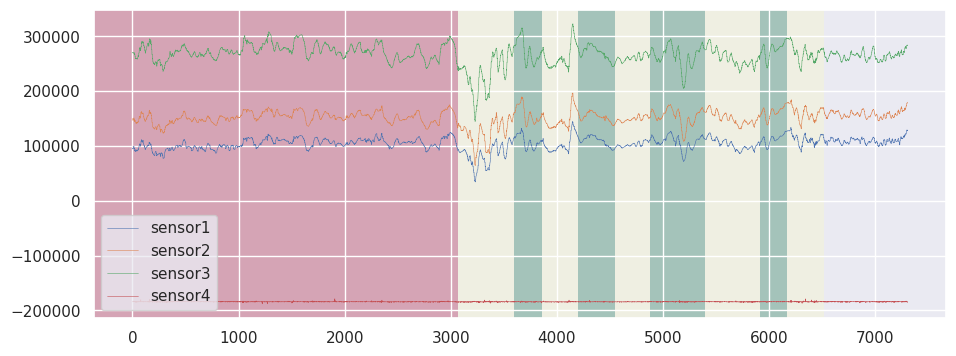

In [12]:
fig = plt.figure(figsize=(12,8), facecolor='white')
axes = mast_verity[['sensor1', 'sensor2', 'sensor3', 'sensor4']].plot(linewidth = 0.4)
axes.pcolorfast(axes.get_xlim(), axes.get_ylim(),
              mast_verity['proc'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.3)

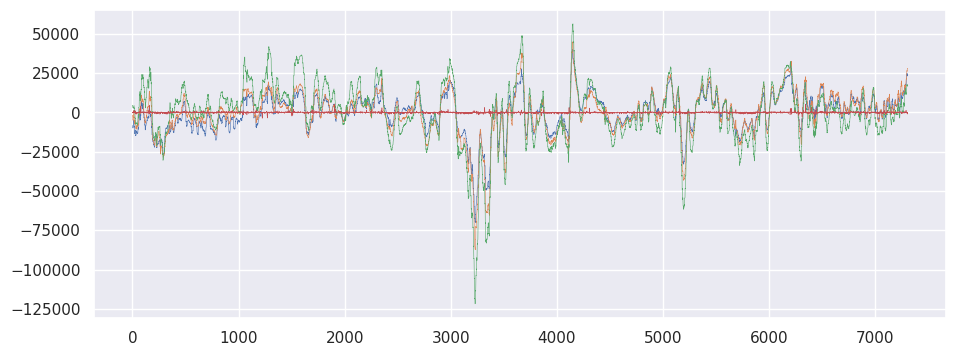

In [13]:
s1_mean = mast_verity['sensor1'].mean()
s2_mean = mast_verity['sensor2'].mean()
s3_mean = mast_verity['sensor3'].mean()
s4_mean = mast_verity['sensor4'].mean()

mplot = (mast_verity['sensor1']-s1_mean).plot(linewidth = 0.4)
mplot = (mast_verity['sensor2']-s2_mean).plot(linewidth = 0.4)
mplot = (mast_verity['sensor3']-s3_mean).plot(linewidth = 0.4)
mplot = (mast_verity['sensor4']-s4_mean).plot(linewidth = 0.4)

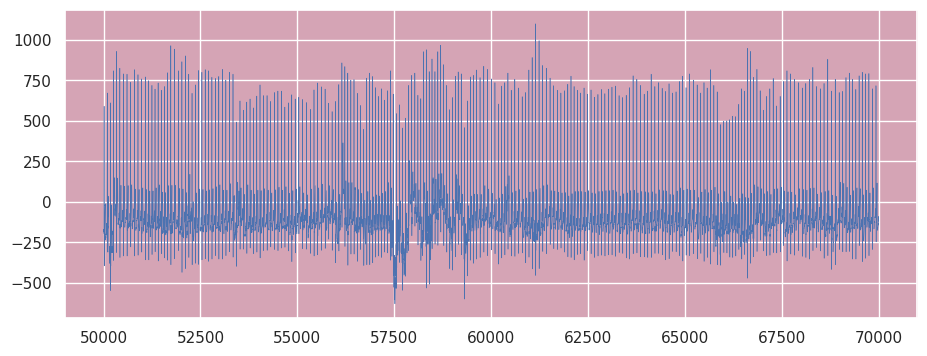

In [19]:
# mplot = mast_h10['sensor'].plot(linewidth = 0.4)
mplot = mast_h10['sensor'][50000:70000].plot(linewidth = 0.4)

# mplot = mast_h10[mast_h10['sensor'] >= 500]['sensor'].plot(linewidth = 1)
# mplot = mast_h10[(mast_h10['sensor'] < 500) & (mast_h10['sensor']> -500)]['sensor'][50000:70000].plot(linewidth = 1)
# mplot = mast_h10[mast_h10['sensor'] < -500]['sensor'].plot(linewidth = 1)
mplot.pcolorfast(mplot.get_xlim(), mplot.get_ylim(), mast_h10['proc'][50000:70000].values[np.newaxis], cmap='RdYlGn', alpha=0.3)